In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("/content/drive/MyDrive/STT NF/Semester 3/Machine Learning/Praktikum Mandiri/Praktikum Mandiri 05/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [11]:
df = df.rename(columns={
    "SepalLengthCm": "panjang_sepal_cm",
    "SepalWidthCm": "lebar_sepal_cm",
    "PetalLengthCm": "panjang_petal_cm",
    "PetalWidthCm": "lebar_petal_cm",
    "Species": "spesies"
})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                150 non-null    int64  
 1   panjang_sepal_cm  150 non-null    float64
 2   lebar_sepal_cm    150 non-null    float64
 3   panjang_petal_cm  150 non-null    float64
 4   lebar_petal_cm    150 non-null    float64
 5   spesies           150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


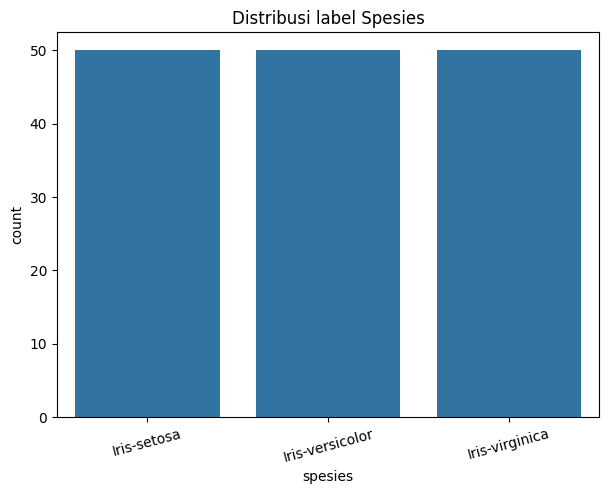

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x="spesies", data=df)
plt.title("Distribusi label Spesies")
plt.xticks(rotation=15)
plt.show()

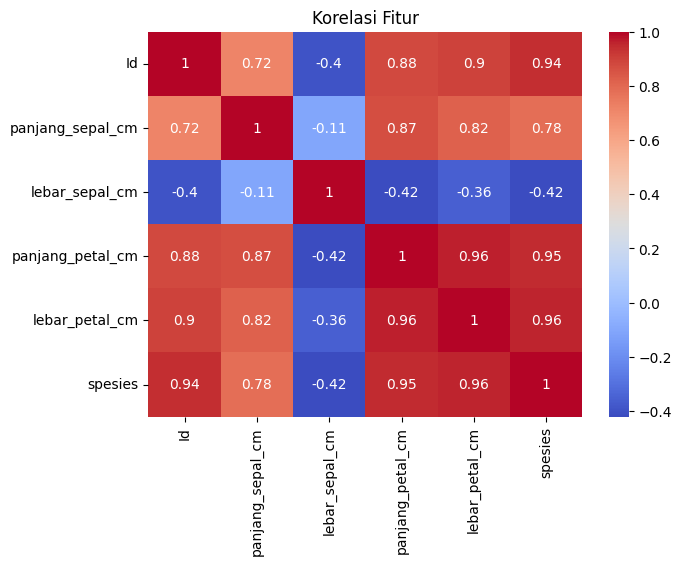

In [25]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [26]:
feature_cols = ['panjang_sepal_cm', 'lebar_sepal_cm', 'panjang_petal_cm', 'lebar_petal_cm']
X = df[feature_cols]
y = df['spesies']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test)

(120, 30)

In [28]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [29]:
y_pred = dt.predict(X_test)
print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=spesies_classes
))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



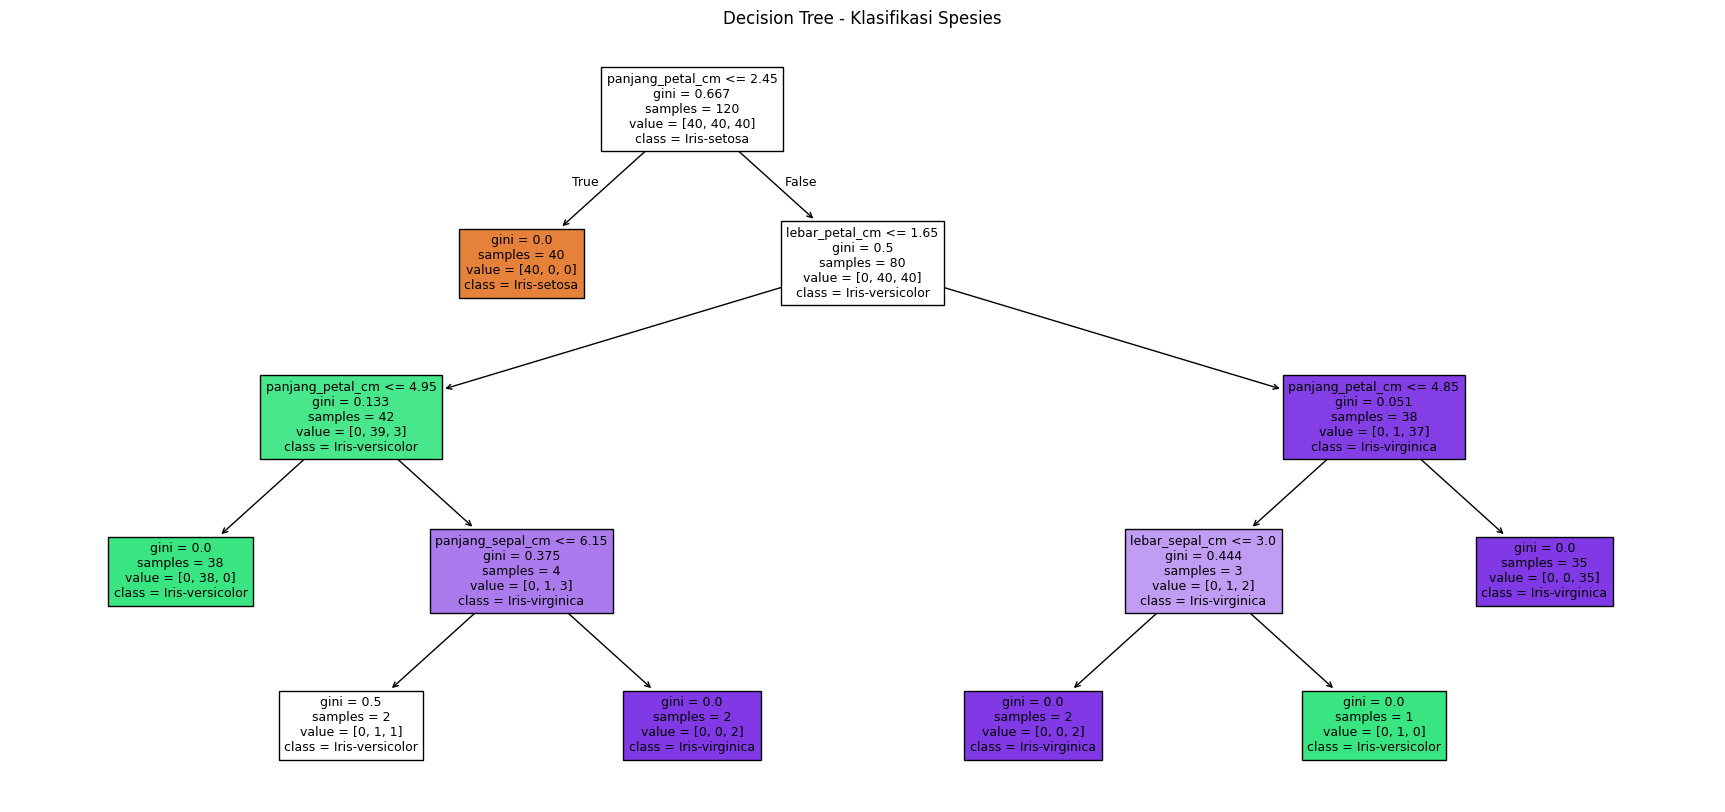

In [30]:
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=spesies_classes, # kembali ke nama kelas asli
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Spesies")
plt.show()

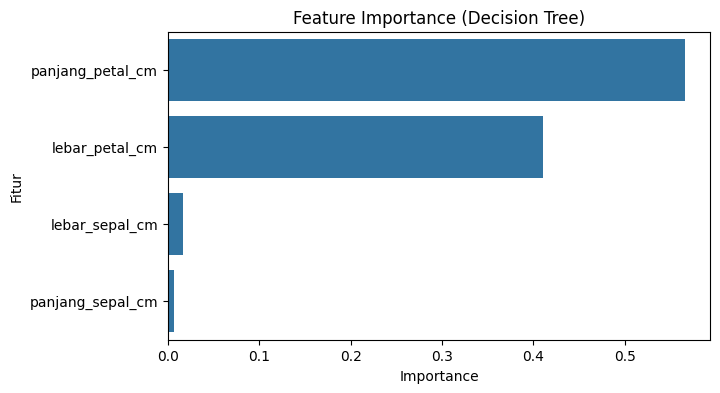

,0
panjang_petal_cm,0.565639
lebar_petal_cm,0.411154
lebar_sepal_cm,0.016878
panjang_sepal_cm,0.006329


In [31]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()
imp

In [32]:
scores = {}
for d in range(2, 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best max_depth: 3 | Acc: 96.67 %
